In [18]:
from utils import load_image, visualize_image

left = load_image('uttower_left.jpg')
right = load_image('uttower_right.jpg')

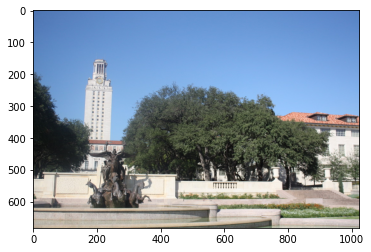

In [19]:
visualize_image(left)

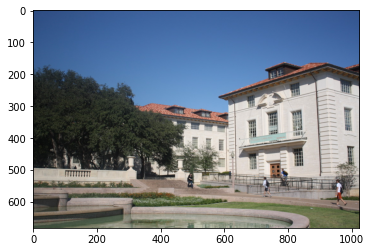

In [20]:
visualize_image(right)

# Feature Detection

In [22]:
from harris import Harris
from hessian import Hessian
from feature_detector import FeatureDetector
from utils import visualize_keypoints
from utils import load_keypoints, save_keypoints

In [23]:
hessian = Hessian()
feature_detector = FeatureDetector(hessian)

In [33]:
try:
    left_keypoints = load_keypoints('results/left_keypoints.json')
    d
except:
    print('No saved keypoints found')
    left_keypoints = feature_detector(left, threshold=50)
    save_keypoints(left_keypoints, 'results/left_keypoints.json')

No saved keypoints found


In [34]:
try:
    right_keypoints = load_keypoints('results/right_keypoints.json')
    d
except:
    print('No saved keypoints found')
    right_keypoints = feature_detector(right, threshold=50)    
    save_keypoints(right_keypoints, 'results/right_keypoints.json')

No saved keypoints found


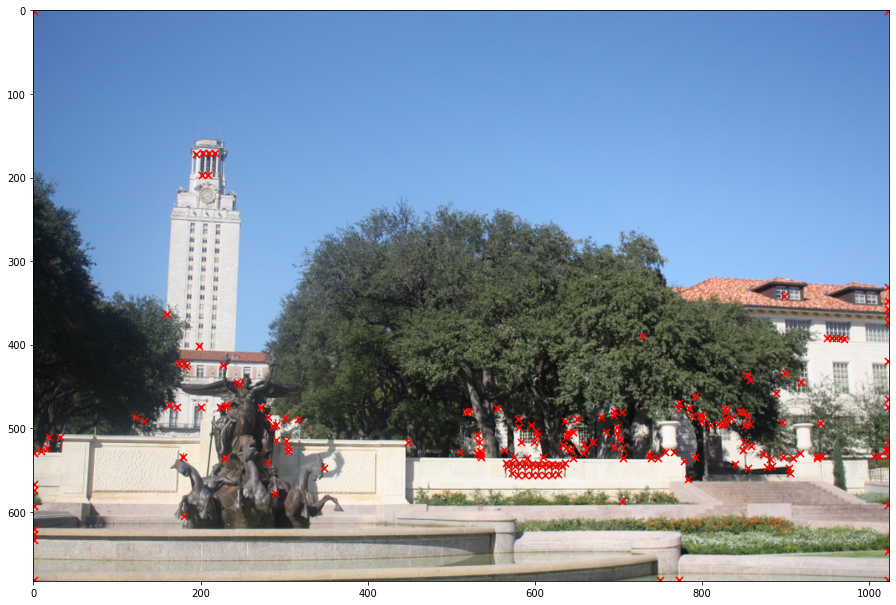

In [35]:
visualize_keypoints(left, left_keypoints)

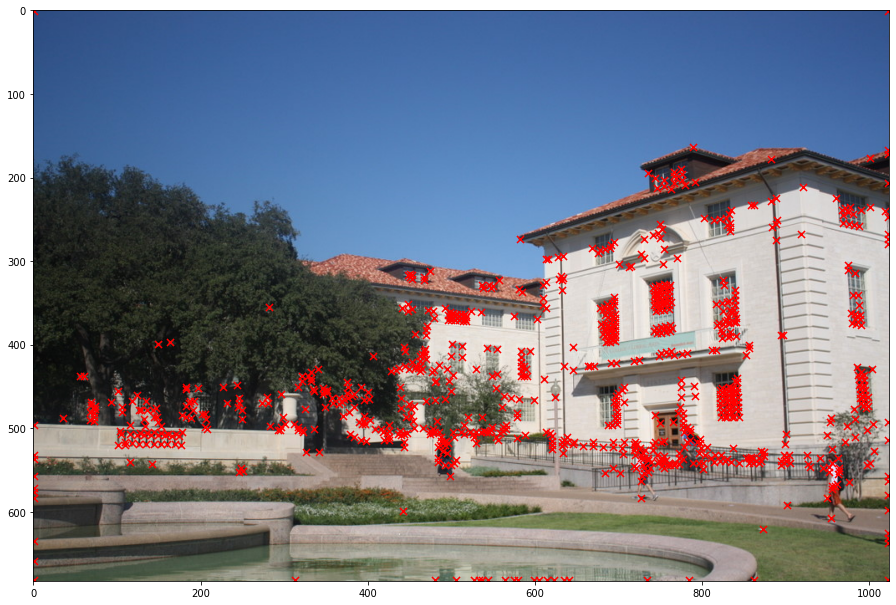

In [36]:
visualize_keypoints(right, right_keypoints)

# Feature Matching

## NCC

In [37]:
from feature_pairer import FeaturePairer
pairer = FeaturePairer(window_size=21, similarity='ncc')

In [38]:
ncc_pairs = pairer(left, left_keypoints, right, right_keypoints)

### Top 20 Pairs

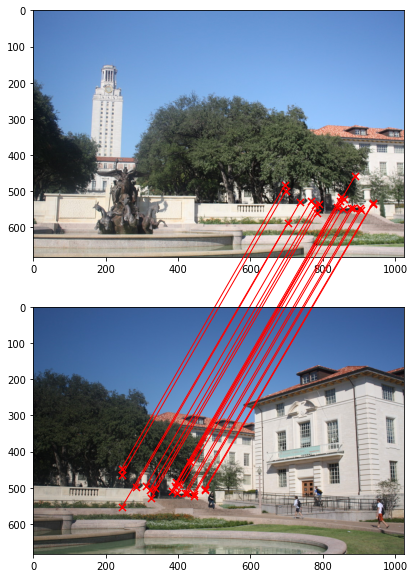

In [39]:
from utils import draw_matches
draw_matches(left, right, list(ncc_pairs.keys())[:20], set_inches=(10,10))

In [40]:
from utils import save_pairs
save_pairs(ncc_pairs, 'results/ncc_pairs.json')

## SSD

In [41]:
from feature_pairer import FeaturePairer
pairer = FeaturePairer(window_size=11, similarity='ssd')

In [42]:
ssd_pairs = pairer(left, left_keypoints, right, right_keypoints)

### Top 20 Pairs

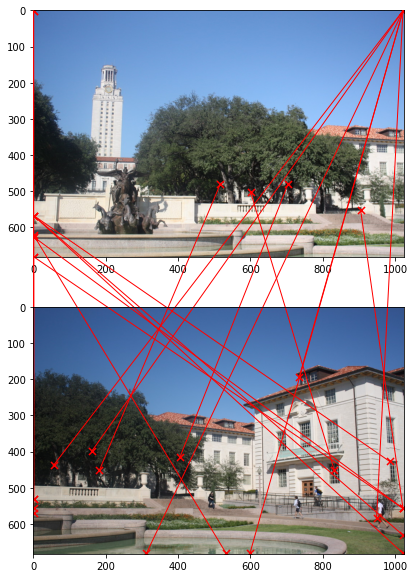

In [43]:
from utils import draw_matches
draw_matches(left, right, list(ssd_pairs.keys())[:20], set_inches=(10,10))

In [17]:
from utils import save_pairs
save_pairs(ssd_pairs, 'results/ssd_pairs.json')